In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import os.path
import matplotlib.patches as mpatches
import sqlite3
import datetime
import nltk
nltk.download('stopwords', quiet=True)
import plotly.express as px
from nltk.corpus import stopwords
from IPython.display import Image
from IPython.core.display import HTML
from wordcloud import WordCloud

from sqlalchemy import create_engine
from sqlalchemy.engine.reflection import Inspector

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

plt.rcParams["figure.figsize"] = (12, 8)

from sklearn import decomposition
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean, cityblock
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.base import clone

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-tw3o01l9 because the default path (/home/cnepomuceno/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# def boxplot(df, decade):
#     """Return boxplots of features in the `df` per `decade`."""

#     df = pd.DataFrame(df, columns=features)
#     df['cluster'] = y_predict
    
#     spotify_color = (sns.color_palette('Greens')[1::2][::-1] 
#                      + sns.color_palette('binary')[0:4])
#     order = decade
#     fig, ax = plt.subplots(3, 3, figsize=(6, 6), dpi=100)
#     features_for_plot = [['loudness', 'danceability', 'energy'],
#                          ['acousticness', 'valence', 'tempo'],
#                          ['instrumentalness', 'speechiness', 'liveness']]
#     for i in range(3):
#         for j in range(3):
#             sns.boxplot(data=df, x='cluster', y=features_for_plot[i][j],
#                         palette=spotify_color, linewidth=1, ax=ax[i][j])
#             ax[i][j].set(title=features_for_plot[i][j], xlabel='cluster', 
#                          ylabel='')
#     plt.tight_layout()
#     plt.show()
    

# spotify_color = (sns.color_palette('Greens')[1::2][::-1] 
#                  + sns.color_palette('binary')[0:4])

# features = ['danceability', 'energy', 'key', 'loudness', 'mode',
#             'speechiness', 'acousticness', 'instrumentalness',
#             'liveness', 'valence', 'tempo']

# len_features = len(features)

# decade_list = [50, 60, 70, 80, 90, 0, 10]
# clusters_per_decade = [3, 2, 2, 2, 3, 3, 4]
# pcs_per_decade = [7, 7, 7, 7, 7, 7, 7]

In [3]:
data = pd.read_csv('eq_cluster_labels.csv')
data.head()

,Unnamed: 0,province,municipality,geom,amenity_counts,school_count,hospital_count,pop,tot_tax_revenue,tot_current_oper_income,...,major_2019,major_2020,major_2021,upper_90_mag,mean_mag_all,max_mag_all,eq_count_since_2010,cluster_label,cluster_label2,island
0,0,Abra,Bangued,"MULTIPOLYGON (((120.62709808 17.49300003, 120....",44.0,2.0,0.0,48163.0,36.556294,230.577076,...,0.0,0.0,0.0,[5.5],5.50,5.5,1.0,0.0,2.0,Luzon
1,1,Abra,Boliney,"MULTIPOLYGON (((120.99041748 17.39801979, 120....",9.0,0.0,0.0,3573.0,0.035633,56.689883,...,0.0,0.0,0.0,[0],0.00,0.0,1.0,0.0,2.0,Luzon
2,2,Abra,Bucay,"MULTIPOLYGON (((120.70787811 17.45395088, 120....",3.0,0.0,0.0,17115.0,1.019565,93.647242,...,0.0,0.0,0.0,[4.6],4.95,5.3,2.0,0.0,2.0,Luzon
3,3,Abra,Bucloc,"MULTIPOLYGON (((120.78955841 17.41699028, 120....",6.0,0.0,0.0,2501.0,0.129150,44.789104,...,0.0,0.0,0.0,[0],0.00,0.0,1.0,0.0,2.0,Luzon
4,4,Abra,Daguioman,"MULTIPOLYGON (((120.9291687 17.41307068, 120.9...",10.0,0.0,0.0,2088.0,0.277660,51.242322,...,0.0,0.0,0.0,[0],0.00,0.0,1.0,0.0,2.0,Luzon


In [4]:
data.columns

Index(['Unnamed: 0', 'province', 'municipality', 'geom', 'amenity_counts',
       'school_count', 'hospital_count', 'pop', 'tot_tax_revenue',
       'tot_current_oper_income',
       ...
       'major_2019', 'major_2020', 'major_2021', 'upper_90_mag',
       'mean_mag_all', 'max_mag_all', 'eq_count_since_2010', 'cluster_label',
       'cluster_label2', 'island'],
      dtype='object', length=106)

In [5]:
data.columns.tolist()

['Unnamed: 0',
 'province',
 'municipality',
 'geom',
 'amenity_counts',
 'school_count',
 'hospital_count',
 'pop',
 'tot_tax_revenue',
 'tot_current_oper_income',
 'pop_density',
 'Point',
 'coordinates',
 'magnitude',
 'time',
 'mean_mag_2010',
 'mean_mag_2011',
 'mean_mag_2012',
 'mean_mag_2013',
 'mean_mag_2014',
 'mean_mag_2015',
 'mean_mag_2016',
 'mean_mag_2017',
 'mean_mag_2018',
 'mean_mag_2019',
 'mean_mag_2020',
 'mean_mag_2021',
 'max_mag_2010',
 'max_mag_2011',
 'max_mag_2012',
 'max_mag_2013',
 'max_mag_2014',
 'max_mag_2015',
 'max_mag_2016',
 'max_mag_2017',
 'max_mag_2018',
 'max_mag_2019',
 'max_mag_2020',
 'max_mag_2021',
 'min_mag_2010',
 'min_mag_2011',
 'min_mag_2012',
 'min_mag_2013',
 'min_mag_2014',
 'min_mag_2015',
 'min_mag_2016',
 'min_mag_2017',
 'min_mag_2018',
 'min_mag_2019',
 'min_mag_2020',
 'min_mag_2021',
 'light_2010',
 'light_2011',
 'light_2012',
 'light_2013',
 'light_2014',
 'light_2015',
 'light_2016',
 'light_2017',
 'light_2018',
 'light_201

In [6]:
data.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [7]:
features = data.drop(labels=['cluster_label',
                             'province', 'municipality', 'geom',
                             'cluster_label2', 'Point', 'coordinates',
                             'magnitude', 'time',], axis=1).columns.tolist()

In [8]:
features = ['mean_mag_all', 'max_mag_all', 'eq_count_since_2010',
            'amenity_counts', 'school_count', 'hospital_count',
            'pop', 'tot_tax_revenue', 'tot_current_oper_income',
            'pop_density']

In [9]:
len(features)

10

In [10]:
def boxplot(df, decade):
    """Return boxplots of features in the `df` per `decade`."""

    df = pd.DataFrame(df, columns=features)
    df['cluster'] = y_predict
    
    spotify_color = (sns.color_palette('Greens')[1::2][::-1] 
                     + sns.color_palette('binary')[0:4])
    order = decade
    fig, ax = plt.subplots(3, 3, figsize=(6, 6), dpi=100)
    features_for_plot = [['loudness', 'danceability', 'energy'],
                         ['acousticness', 'valence', 'tempo'],
                         ['instrumentalness', 'speechiness', 'liveness']]
    for i in range(3):
        for j in range(3):
            sns.boxplot(data=df, x='cluster', y=features_for_plot[i][j],
                        palette=spotify_color, linewidth=1, ax=ax[i][j])
            ax[i][j].set(title=features_for_plot[i][j], xlabel='cluster', 
                         ylabel='')
    plt.tight_layout()
    plt.show()

In [11]:
data['cluster_label2'].dtypes

dtype('float64')

In [12]:
change_val = {0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D'}
data['cluster_label3'] = data['cluster_label2'].map(change_val)
data

,province,municipality,geom,amenity_counts,school_count,hospital_count,pop,tot_tax_revenue,tot_current_oper_income,pop_density,...,major_2020,major_2021,upper_90_mag,mean_mag_all,max_mag_all,eq_count_since_2010,cluster_label,cluster_label2,island,cluster_label3
0,Abra,Bangued,"MULTIPOLYGON (((120.62709808 17.49300003, 120....",44.0,2.0,0.0,48163.0,36.556294,230.577076,4.575788e+06,...,0.0,0.0,[5.5],5.50,5.5,1.0,0.0,2.0,Luzon,C
1,Abra,Boliney,"MULTIPOLYGON (((120.99041748 17.39801979, 120....",9.0,0.0,0.0,3573.0,0.035633,56.689883,2.300790e+05,...,0.0,0.0,[0],0.00,0.0,1.0,0.0,2.0,Luzon,C
2,Abra,Bucay,"MULTIPOLYGON (((120.70787811 17.45395088, 120....",3.0,0.0,0.0,17115.0,1.019565,93.647242,1.926863e+06,...,0.0,0.0,[4.6],4.95,5.3,2.0,0.0,2.0,Luzon,C
3,Abra,Bucloc,"MULTIPOLYGON (((120.78955841 17.41699028, 120....",6.0,0.0,0.0,2501.0,0.129150,44.789104,5.735264e+05,...,0.0,0.0,[0],0.00,0.0,1.0,0.0,2.0,Luzon,C
4,Abra,Daguioman,"MULTIPOLYGON (((120.9291687 17.41307068, 120.9...",10.0,0.0,0.0,2088.0,0.277660,51.242322,2.523502e+05,...,0.0,0.0,[0],0.00,0.0,1.0,0.0,2.0,Luzon,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,Zamboanga Sibugay,Naga,"MULTIPOLYGON (((122.77500153 7.76833296, 122.7...",2.0,0.0,0.0,38547.0,1.971273,111.794689,2.861438e+06,...,0.0,0.0,"[6.1, 7.3]",7.00,7.6,3.0,0.0,0.0,Mindanao,A
1643,Zamboanga Sibugay,Talusan,"MULTIPOLYGON (((122.91916656 7.34111023, 122.9...",1.0,0.0,0.0,29969.0,0.395521,67.680146,7.223952e+06,...,0.0,0.0,"[6.6, 6.1, 7.3]",6.90,7.6,4.0,0.0,0.0,Mindanao,A
1644,Zamboanga Sibugay,Olutanga,"MULTIPOLYGON (((122.85804749 7.27652979, 122.8...",2.0,0.0,0.0,33671.0,0.820690,93.391956,5.978291e+06,...,0.0,0.0,"[6.6, 6.1, 7.3]",6.90,7.6,4.0,0.0,0.0,Mindanao,A
1645,Zamboanga Sibugay,Payao,"MULTIPOLYGON (((122.69194794 7.46228981, 122.6...",8.0,0.0,0.0,31686.0,1.209460,97.101100,1.979630e+06,...,0.0,0.0,"[6.1, 7.3]",7.00,7.6,3.0,0.0,0.0,Mindanao,A


In [13]:
print(sns.color_palette("rocket").as_hex())

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


In [14]:
(sns.color_palette("rocket").as_hex())

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']

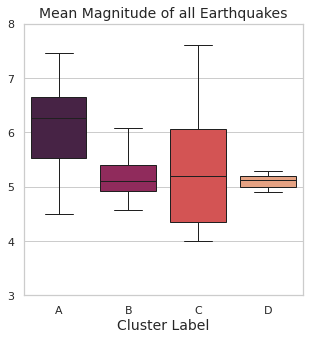

In [52]:
# Plot mean magnitude

fig, ax = plt.subplots(figsize=(5,5))
sns.set_style('whitegrid')
fig = sns.boxplot(data=data, x='cluster_label3', y='mean_mag_all',
            linewidth=1, palette='rocket',
            order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
fig.set_ylim([3,8])
fig.set_ylabel('', fontsize=14)
fig.set_xlabel('Cluster Label', fontsize=14)
fig.set_title('Mean Magnitude of all Earthquakes', fontsize=14)
fig.tick_params(labelsize=11);
plt.savefig('boxplot_mag.png')

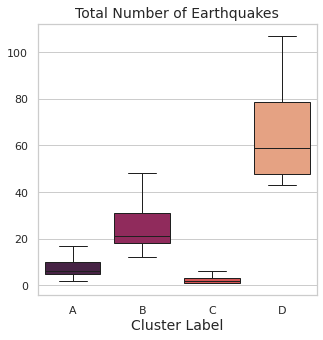

In [53]:
# fig, ax = plt.subplots(figsize=(6,6))

# # sns.set(font_scale = 1)
# sns.set_style('whitegrid')
# # color_map = {'A': '#35193e', 'B': '#701f57', 'C': '#f37651', 'D': '#f6b48f'}
# sns.boxplot(data=data, x='cluster_label3', y='eq_count_since_2010',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax)
# # plt.ylim([3,8])
# plt.xlabel('Cluster Name')
# plt.ylabel('Total Number of Earthquakes (2010-2021)');

# Plot mean magnitude

# fig, ax = plt.subplots(figsize=(5,5))
# sns.set_style('whitegrid')
# fig = sns.boxplot(data=data, x='cluster_label3', y='eq_count_since_2010',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# # fig.set_ylim([3,8])
# fig.set_xlabel('Cluster Name', fontsize=14)
# fig.set_ylabel('Total Number of Earthquakes', fontsize=14)
# fig.tick_params(labelsize=11);
# plt.savefig('boxplot_eqcount.png')


fig, ax = plt.subplots(figsize=(5,5))
sns.set_style('whitegrid')
fig = sns.boxplot(data=data, x='cluster_label3', y='eq_count_since_2010',
            linewidth=1, palette='rocket',
            order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# fig.set_ylim([3,8])
fig.set_ylabel('', fontsize=14)
fig.set_xlabel('Cluster Label', fontsize=14)
fig.set_title('Total Number of Earthquakes', fontsize=14)
fig.tick_params(labelsize=11);
plt.savefig('boxplot_eqcount.png')

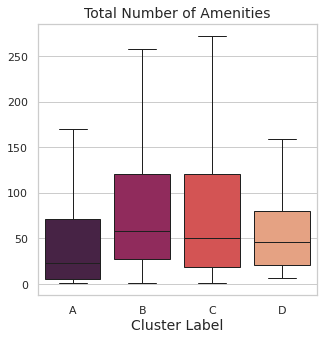

In [54]:
# fig, ax = plt.subplots(figsize=(6,6))

# # sns.set(font_scale = 1)
# sns.set_style('whitegrid')
# # color_map = {'A': '#35193e', 'B': '#701f57', 'C': '#f37651', 'D': '#f6b48f'}
# sns.boxplot(data=data, x='cluster_label3', y='amenity_counts',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# plt.ylim([0,300])
# plt.xlabel('Cluster Name')
# plt.ylabel('Total Number of Amenities');

# fig, ax = plt.subplots(figsize=(5,5))
# sns.set_style('whitegrid')
# fig = sns.boxplot(data=data, x='cluster_label3', y='amenity_counts',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# # fig.set_ylim([3,8])
# fig.set_xlabel('Cluster Name', fontsize=14)
# fig.set_ylabel('Total Number of Amenities', fontsize=14)
# fig.tick_params(labelsize=11);
# plt.savefig('boxplot_amenity.png')


fig, ax = plt.subplots(figsize=(5,5))
sns.set_style('whitegrid')
fig = sns.boxplot(data=data, x='cluster_label3', y='amenity_counts',
            linewidth=1, palette='rocket',
            order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# fig.set_ylim([3,8])
fig.set_ylabel('', fontsize=14)
fig.set_xlabel('Cluster Label', fontsize=14)
fig.set_title('Total Number of Amenities', fontsize=14)
fig.tick_params(labelsize=11);
plt.savefig('boxplot_amenity.png')

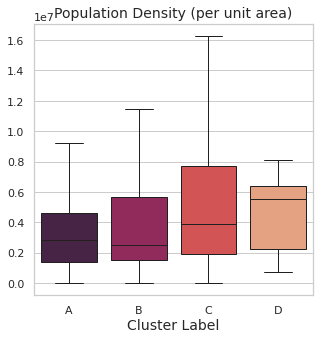

In [55]:
# fig, ax = plt.subplots(figsize=(6,6))

# # sns.set(font_scale = 1)
# sns.set_style('whitegrid')
# # color_map = {'A': '#35193e', 'B': '#701f57', 'C': '#f37651', 'D': '#f6b48f'}
# sns.boxplot(data=data, x='cluster_label3', y='pop_density',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# # plt.ylim([0,300])
# plt.xlabel('Cluster Name')
# plt.ylabel('Population Density (per unit area)');

# fig, ax = plt.subplots(figsize=(5,5))
# sns.set_style('whitegrid')
# fig = sns.boxplot(data=data, x='cluster_label3', y='pop_density',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# # fig.set_ylim([3,8])
# fig.set_xlabel('Cluster Name', fontsize=14)
# fig.set_ylabel('Population Density (per unit area)', fontsize=14)
# fig.tick_params(labelsize=11);
# plt.savefig('boxplot_pop.png')


fig, ax = plt.subplots(figsize=(5,5))
sns.set_style('whitegrid')
fig = sns.boxplot(data=data, x='cluster_label3', y='pop_density',
            linewidth=1, palette='rocket',
            order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# fig.set_ylim([3,8])
fig.set_ylabel('', fontsize=14)
fig.set_xlabel('Cluster Label', fontsize=14)
fig.set_title('Population Density (per unit area)', fontsize=14)
fig.tick_params(labelsize=11);
plt.savefig('boxplot_pop.png')

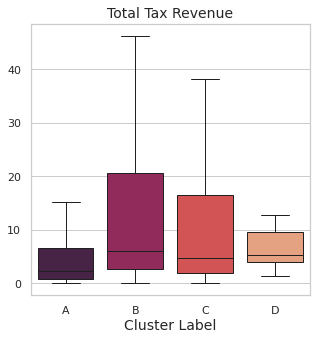

In [56]:
# fig, ax = plt.subplots(figsize=(5,5))
# sns.set_style('whitegrid')
# fig = sns.boxplot(data=data, x='cluster_label3', y='tot_tax_revenue',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# # fig.set_ylim([3,8])
# fig.set_xlabel('Cluster Name', fontsize=14)
# fig.set_ylabel('Total Tax Revenue', fontsize=14)
# fig.tick_params(labelsize=11);
# plt.savefig('boxplot_tax.png')


fig, ax = plt.subplots(figsize=(5,5))
sns.set_style('whitegrid')
fig = sns.boxplot(data=data, x='cluster_label3', y='tot_tax_revenue',
            linewidth=1, palette='rocket',
            order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# fig.set_ylim([3,8])
fig.set_ylabel('', fontsize=14)
fig.set_xlabel('Cluster Label', fontsize=14)
fig.set_title('Total Tax Revenue', fontsize=14)
fig.tick_params(labelsize=11);
plt.savefig('boxplot_tax.png')

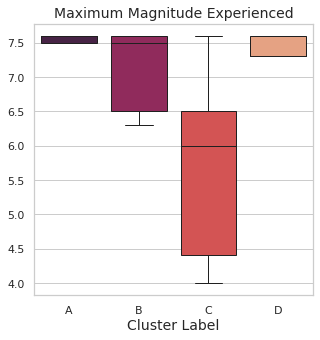

In [57]:
# fig, ax = plt.subplots(figsize=(5,5))
# sns.set_style('whitegrid')
# fig = sns.boxplot(data=data, x='cluster_label3', y='max_mag_all',
#             linewidth=1, palette='rocket',
#             order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# # fig.set_ylim([3,8])
# fig.set_xlabel('Cluster Name', fontsize=14)
# fig.set_ylabel('Maximum Magnitude Experienced', fontsize=14)
# fig.tick_params(labelsize=11);
# plt.savefig('boxplot_maxmag.png')


fig, ax = plt.subplots(figsize=(5,5))
sns.set_style('whitegrid')
fig = sns.boxplot(data=data, x='cluster_label3', y='max_mag_all',
            linewidth=1, palette='rocket',
            order=['A', 'B', 'C', 'D'], ax=ax, showfliers = False)
# fig.set_ylim([3,8])
fig.set_ylabel('', fontsize=14)
fig.set_xlabel('Cluster Label', fontsize=14)
fig.set_title('Maximum Magnitude Experienced', fontsize=14)
fig.tick_params(labelsize=11);
plt.savefig('boxplot_maxmag.png')

In [ ]:
data.amenity_counts.value_counts()

In [ ]:
def boxplot(df):
    """Return boxplots of features in the `df` per `decade`."""

    fig, ax = plt.subplots(4, 3, figsize=(15, 15))
    ax = ax.flatten()

    for i in range(10):
        sns.boxplot(data=df, x='cluster_label2', y=features[i], linewidth=1, ax=ax[i])
        ax[i].set(title=features[i], xlabel='cluster', 
                     ylabel='')
    plt.tight_layout()
    plt.show()

In [ ]:
data.columns

In [ ]:
data.cluster_label2.value_counts()

In [ ]:
data.cluster_label2.unique()

In [37]:
data.columns

Index(['province', 'municipality', 'geom', 'amenity_counts', 'school_count',
       'hospital_count', 'pop', 'tot_tax_revenue', 'tot_current_oper_income',
       'pop_density',
       ...
       'major_2020', 'major_2021', 'upper_90_mag', 'mean_mag_all',
       'max_mag_all', 'eq_count_since_2010', 'cluster_label', 'cluster_label2',
       'island', 'cluster_label3'],
      dtype='object', length=106)

In [ ]:
data[data.cluster_label2 == 1]['province'].unique()

In [ ]:
data[data.cluster_label2 == 3]['province'].unique()

In [ ]:
data[data.cluster_label2 == 2]['province'].unique()

In [ ]:
data[data.cluster_label2 == 0]['province'].unique()

In [ ]:
boxplot(data)

In [ ]:
clustered = data.groupby('cluster_label2').mean().reset_index(0)
clustered

In [ ]:
clustered.columns

In [ ]:
clustered = clustered[['cluster_label2', 'amenity_counts', 'school_count',
                       'hospital_count', 'pop_density', 'tot_tax_revenue',
                       'tot_current_oper_income',
                       'mean_mag_all', 'max_mag_all', 'eq_count_since_2010']]

In [ ]:
import pandas as pd
from sklearn import preprocessing

x = clustered.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

In [ ]:
df.columns = clustered.columns

In [ ]:
df

In [ ]:
bar_plot = pd.melt(df, id_vars='cluster_label2', var_name='features', value_name='value')

In [ ]:
bar_plot

In [ ]:
# plt.rcParams['figure.figsize']=(20, 15)

g = sns.catplot(x='cluster_label2', y='value', hue='features', data=bar_plot,
            kind='bar')
g.fig.set_size_inches(8,8)